### Problem Statement
### Output variable -> y 
### y -> Whether the client has subscribed a term deposit or not. Binomial ("yes" or "no")


In [35]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [9]:
# reading the file
bank = pd.read_csv('bank1.csv')
bank 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Dropping unnecessory columns

In [12]:
bank.drop(['job','age','marital','education','balance','contact','day','month','duration','poutcome'], inplace = True, axis=1)


### Changing string values to numeric values

In [13]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [14]:
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})

In [15]:
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})

In [16]:
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})

In [17]:
bank.head()

,default,housing,loan,campaign,pdays,previous,y
0,0,1,0,1,-1,0,0
1,0,1,0,1,-1,0,0
2,0,1,1,1,-1,0,0
3,0,1,0,1,-1,0,0
4,0,0,0,1,-1,0,0



### EDA

<AxesSubplot:xlabel='y', ylabel='count'>

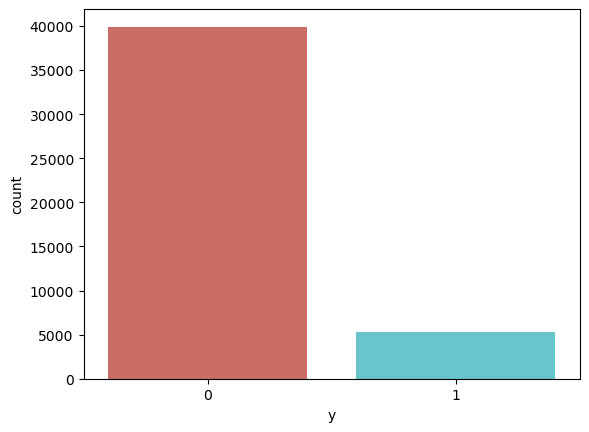

In [18]:
sn.countplot(x='y', data=bank, palette='hls')

<AxesSubplot:xlabel='loan', ylabel='count'>

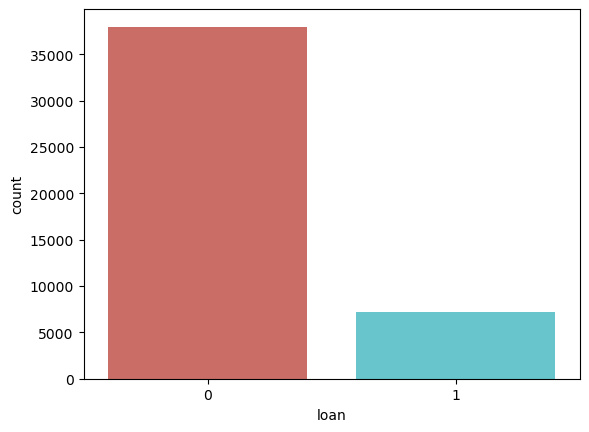

In [19]:
sn.countplot(x='loan', data=bank, palette='hls')

<AxesSubplot:xlabel='housing', ylabel='count'>

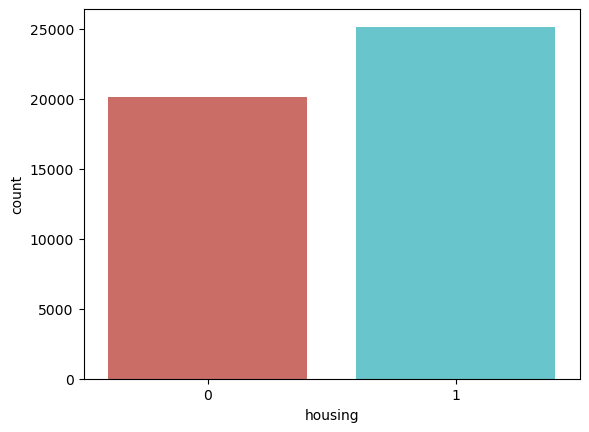

In [20]:
sn.countplot(x='housing', data=bank, palette='hls')

<AxesSubplot:xlabel='default', ylabel='count'>

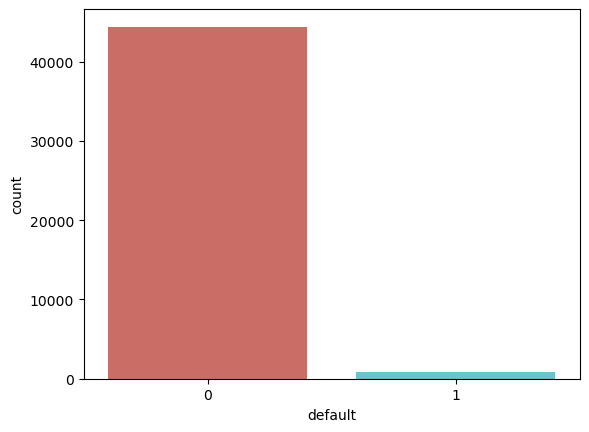

In [21]:
sn.countplot(x='default', data=bank, palette='hls')

In [22]:
bank.sum()

default         815
housing       25130
loan           7244
campaign     124956
pdays       1817384
previous      26237
y              5289
dtype: int64

### Shape and Null values

In [24]:
bank.shape

(45211, 7)

In [25]:
bank.isnull().sum()

default     0
housing     0
loan        0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

### Dividing our data into input and output variables

In [26]:
X = bank.iloc[:,1:]  ### Excluding zeroth column, every other columns is in X 
Y = bank.iloc[:,0]  ### Zeroth column is in Y 

### Logistic regression and fitting the model

In [27]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()


### Predict for X data

In [28]:
Y_pred = classifier.predict(X)


In [30]:
Y_pred_df = pd.DataFrame({'actual' : Y, 'Predicted_prob' : classifier.predict(X) })

In [31]:
Y_pred_df 

,actual,Predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


### Confusion matrics for the model accuracy 

In [32]:
cm = confusion_matrix(Y, Y_pred)
print(cm) 

[[44396     0]
 [  815     0]]


In [33]:
# Checking  Accuracy
((44396 + 0) / (44396 + 0 + 815 + 0))*100

98.19734135497998

### Classification Report

In [34]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     44396
           1       0.00      0.00      0.00       815

    accuracy                           0.98     45211
   macro avg       0.49      0.50      0.50     45211
weighted avg       0.96      0.98      0.97     45211



C:\Users\Padmakar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Padmakar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Padmakar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC Curve

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1]) 

In [38]:
auc = roc_auc_score(Y,Y_pred)
print(auc) 

0.5


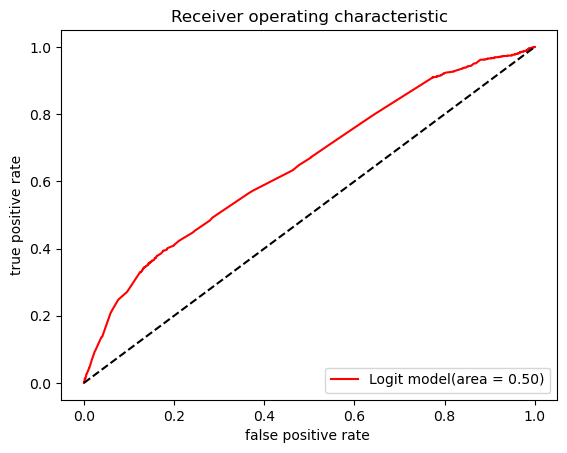

auc accuracy 0.5


In [42]:
plt.plot(fpr, tpr, color = 'red',label='Logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('Receiver operating characteristic')
plt.xlabel('false positive rate ')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.show()   
print('auc accuracy', auc)

In [45]:
import statsmodels.api as sm   

In [46]:
logit = sm.Logit(Y, X)

In [47]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.141690
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45205
Method:                           MLE   Df Model:                            5
Date:                Sat, 28 Jan 2023   Pseudo R-squ.:                 -0.5699
Time:                        12:16:21   Log-Likelihood:                -6406.0
converged:                       True   LL-Null:                       -4080.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
housing       -1.7776      0.054    -32.759      0.000      -1.884      -1.671
loan          -0.1486      0.066     -2.243      0.025      -0.278      -0.019
campaign      -1.2427      0.020    -62.570      0.000      -1.282      -1.204
pdays         -0.0047      0.001     -6.286      0.000      -0.006      -0.003
previous      -0.2434      0.055     -4.449      0.000      -0.351      -0.136
y             -2.0844      0.142    -14.633      0.000      -2.364      -1.805
==============================================================================
"""

In [43]:
fpr 

array([0.00000000e+00, 2.25245518e-05, 1.35147311e-04, ...,
       9.98423281e-01, 9.98468330e-01, 1.00000000e+00])

In [44]:
thresholds 

array([1.11584926e+00, 1.15849264e-01, 8.90334283e-02, ...,
       2.40217558e-03, 2.39661758e-03, 7.08517790e-08])